In [2]:
  #importing required libraries
import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...


# 2. Importing Dataset

In [3]:
data = pd.read_csv(r"C:\IPBA Files\BYOP Files\Sentiment Analysis\Comments Data\Balenciaga_Comments_.csv")

In [4]:
data.head()

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-21T16:26:27Z,thank you for making this and calling them out,47
1,2.0,NaN,0,2023-02-18T01:07:25Z,hi blaire im surprised when you said youre not spiritual and that you dont believe in god because youre a very enlightened soul who is aligned with the truth and thats rare in this world keep up the good work and thank you for supporting jk rowling 💖,258
2,3.0,NaN,0,2023-02-17T22:44:42Z,blaire you rock thank you for talking about this issue and for calling out celebrities and the left for being silent about it how on earth fighting pedophilia is a partisan issue it must be everybodys goal,213
3,4.0,NaN,0,2023-02-17T04:08:11Z,kids are the one thing we should all agree with dont fuck with kids period,75
4,5.0,NaN,0,2023-02-16T19:05:02Z,i always say the most wretched of them all are very similar to the most priviledged of them all when it comes to their greed and lack of morals,144


In [5]:
data['Comments'] =data['Comments'].astype(str)

In [6]:
data = data[['Comments', 'text_length']][:300]

In [6]:
data.head()

,Comments,text_length
0,thank you for making this and calling them out,47
1,hi blaire im surprised when you said youre not spiritual and that you dont believe in god because youre a very enlightened soul who is aligned with the truth and thats rare in this world keep up the good work and thank you for supporting jk rowling 💖,258
2,blaire you rock thank you for talking about this issue and for calling out celebrities and the left for being silent about it how on earth fighting pedophilia is a partisan issue it must be everybodys goal,213
3,kids are the one thing we should all agree with dont fuck with kids period,75
4,i always say the most wretched of them all are very similar to the most priviledged of them all when it comes to their greed and lack of morals,144


In [7]:
data.dtypes

Comments       object
text_length     int64
dtype: object

In [8]:
data.shape

(300, 2)

<AxesSubplot: ylabel='Frequency'>

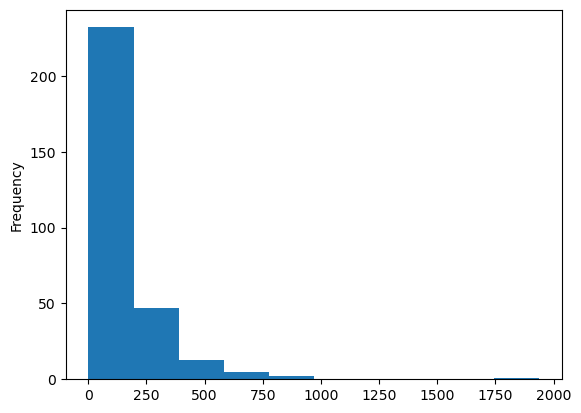

In [9]:
data.loc[:,'text_length'].plot.hist(bins = 10)

# 3. Removing panctuation & converting to lower case

In [10]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [11]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [13]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

# 4. Emoticons, Special Char & stopwords

In [14]:
# Get Stopwords
stop = stopwords.words('english')

In [15]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                        [thank, making, calling]
1      [hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]
2                                                 [blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]
3                                                                                                                                             [kids, one, thing, agree, dont, fuck, kids, period]
4                                                                                                                       [always, say, wretched, similar, priviledged, comes, greed, lack, morals]
                              

In [16]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
##Remove emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)



In [18]:
# Apply the remove_emoticons function to the 'Comments' column
data['Comments'] = data['Comments'].apply(remove_emoticons)

# 5. Lemmatize

In [19]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [20]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

# 6. Tweet Tokenize

In [21]:
import nltk
from nltk.tokenize import TweetTokenizer

# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

# 7. POS Tagging

In [22]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [23]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [24]:
data.head()

,Comments,text_length,Tokens,POS_Tagged
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]"
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]"
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]"
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]"
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]"


# Approach 1) Analysing sentiments through vader

In [25]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [26]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [27]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124


In [28]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

count_total=0
count_pos=0
count_neg=0
count_neut=0


for i in data["vader_score"]:
    if i >0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)
print("neutral tweets:",count_neut)
conditions = [
    (data['vader_score'] >0),
    (data['vader_score'] <0),
    (data['vader_score'] == 0)]
choices = [1,2,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 153
negative tweets: 99
neutral tweets: 48


In [29]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,0
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,2


In [30]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==-1:
        lable= ("Negative")
    else:
        lable= ("Neutral")

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==2),
(data['vader_sentiment'] == 0)
choices = ["Positive","Negative","Neutral"]

data['Vader_Labels'] = np.select(conditions, choices )


In [31]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment,Vader_Labels
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1,Positive
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,0,Neutral
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,2,Negative


<AxesSubplot: xlabel='Vader_Labels', ylabel='count'>

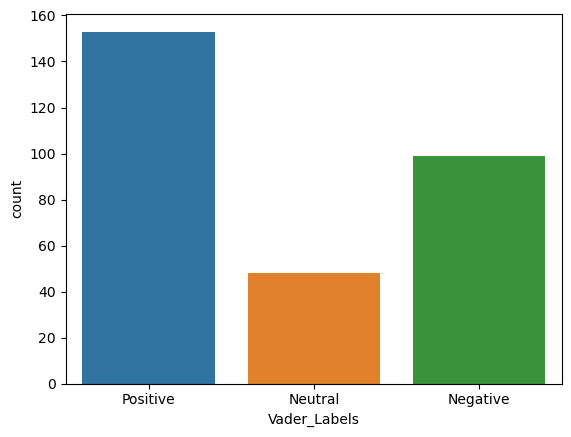

In [32]:
import seaborn as sns

sns.countplot(x='Vader_Labels', data=data)

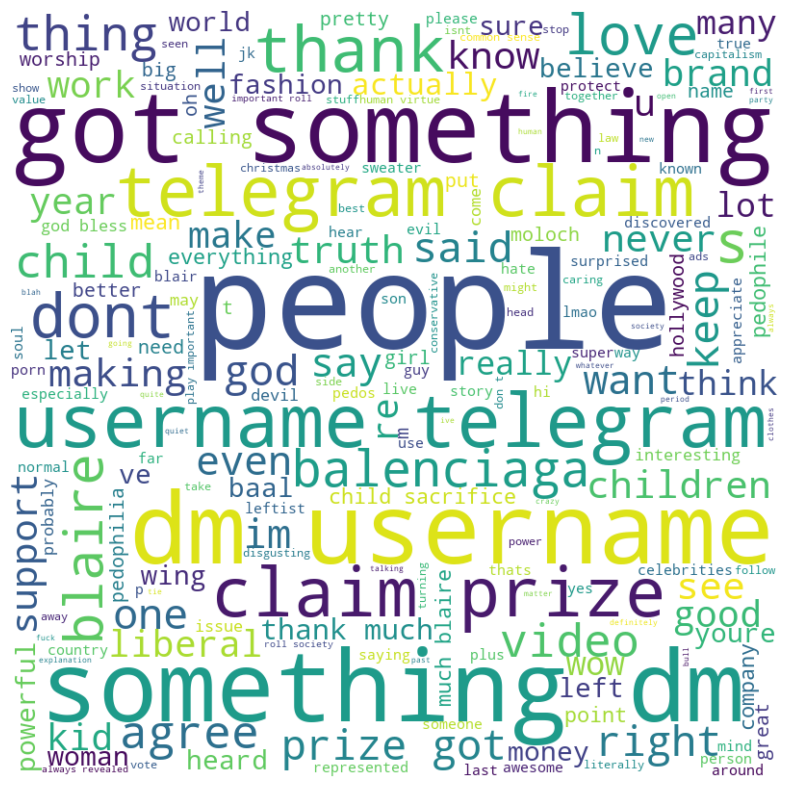

---------------


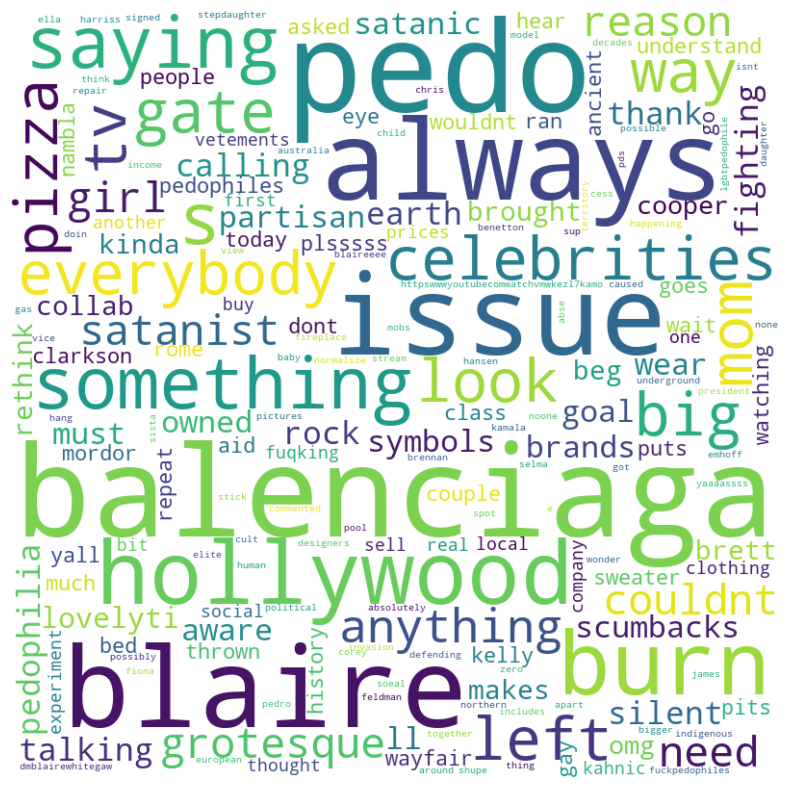

---------------


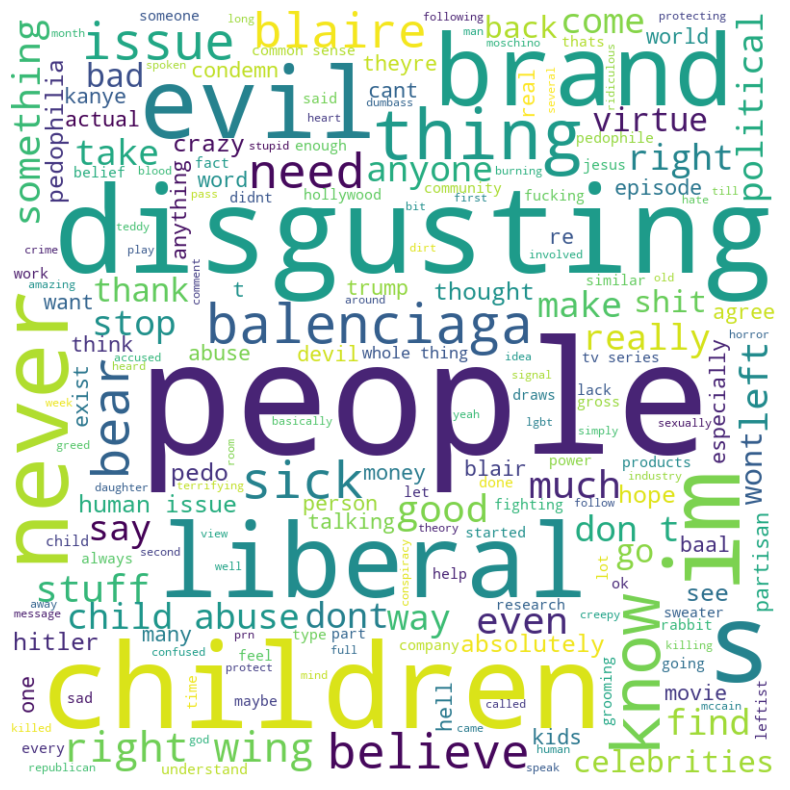

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['Vader_Labels'] == 'Positive']['Comments'].tolist())
neutral_tweets = ' '.join(data[data['Vader_Labels'] == 'Neutral']['Comments'].tolist())
negative_tweets = ' '.join(data[data['Vader_Labels'] == 'Negative']['Comments'].tolist())

generate_wordcloud(positive_tweets)
print("---------------")
generate_wordcloud(neutral_tweets)
print("---------------")
generate_wordcloud(negative_tweets)


# Approach 2) Analysing sentiments through huggingface transformers

In [34]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [39]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [35]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

text = data['Comments'].tolist()[:100]

sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['thank making calling', 'hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling', 'blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal', 'kids one thing agree dont fuck kids period', 'always say wretched similar priviledged comes greed lack morals', 'i’ve lot research it’s staggering what’s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i’m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud', 'dont u think people going create brands thing', 'im pretty sure one normal left right lib seditionist name want pedophilia heck woman last thing portugal clergy theme', 'thank content blaire', 'give clothes charity i

In [36]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'POSITIVE', 'score': 0.9998476505279541},
 {'label': 'POSITIVE', 'score': 0.9992151260375977},
 {'label': 'POSITIVE', 'score': 0.9829915165901184},
 {'label': 'NEGATIVE', 'score': 0.8874287009239197},
 {'label': 'NEGATIVE', 'score': 0.9992269277572632},
 {'label': 'NEGATIVE', 'score': 0.9421718120574951},
 {'label': 'NEGATIVE', 'score': 0.9833018183708191},
 {'label': 'NEGATIVE', 'score': 0.9950954914093018},
 {'label': 'POSITIVE', 'score': 0.9998338222503662},
 {'label': 'NEGATIVE', 'score': 0.9923591017723083},
 {'label': 'NEGATIVE', 'score': 0.9982255101203918},
 {'label': 'POSITIVE', 'score': 0.7060955762863159},
 {'label': 'NEGATIVE', 'score': 0.9825385808944702},
 {'label': 'POSITIVE', 'score': 0.999854564666748},
 {'label': 'POSITIVE', 'score': 0.9996826648712158},
 {'label': 'POSITIVE', 'score': 0.999692440032959},
 {'label': 'POSITIVE', 'score': 0.9608718156814575},
 {'label': 'NEGATIVE', 'score': 0.9960849285125732},
 {'label': 'NEGATIVE', 'score': 0.98020064830780

In [37]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['Transformer_Labels'] = [s['label'] for s in sentiments]
data['Transformer_Score'] = [s['score'] for s in sentiments]

In [38]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment,Vader_Labels,Transformer_Labels,Transformer_Score
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive,POSITIVE,0.999848
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1,Positive,POSITIVE,0.999215
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,0,Neutral,POSITIVE,0.982992
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive,NEGATIVE,0.887429
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,2,Negative,NEGATIVE,0.999227


<AxesSubplot: xlabel='Transformer_Labels', ylabel='count'>

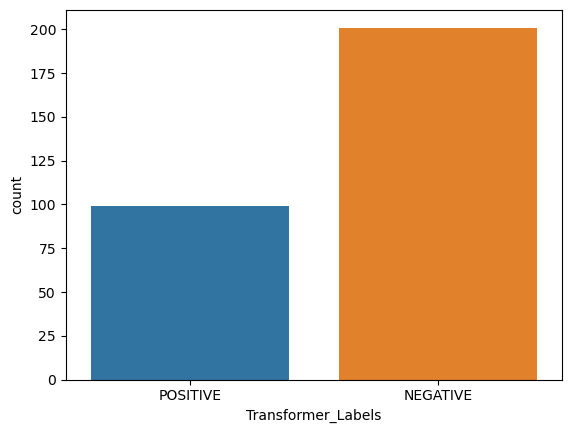

In [39]:
import seaborn as sns

sns.countplot(x='Transformer_Labels', data=data)

# Approach 3) Analysing sentiments through roberta

In [40]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [46]:
!transformers-cli cache clear

Traceback (most recent call last):
  File "C:\Users\himanshu.sharma2\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 62, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\himanshu.sharma2\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\himanshu.sharma2\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\himanshu.sharma2\Anaconda3\Scripts\transformers-cli.exe\__main__.py", line 4, in <module>
  File "C:\Users\himanshu.sharma2\Anaconda3\lib\site-packages\transformers\commands\transformers_cli.py", line 24, in <module>
    from .pt_to_tf import PTtoTFCommand
  File "C:\Users

In [47]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model_name = 'roberta-base'
model = RobertaForSequenceClassification.from_pretrained(model_name,from_tf=True)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

C:\Users\himanshu.sharma2\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\himanshu.sharma2\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:75] data. DefaultCPUAllocator: not enough memory: you tried to allocate 9437184 bytes. Buy new RAM!

In [47]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [48]:
## To check and compare polarity scores from vader against roberta we'll create an object( lets say Sample) containing random tweet.
Sample = 'sad last election folks still voted dem get'
print(Sample)

sad last election folks still voted dem get


In [44]:
import pandas as pd
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Load pre-trained model and tokenizer
model_name = 'roberta-base'
model = RobertaForSequenceClassification.from_pretrained(model_name,from_tf=True)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

# Tokenize input texts
inputs = tokenizer(list(data['Comments']), return_tensors='pt', padding=True, truncation=True, max_length=128)

# Pass input through model to generate scores
outputs = model(**inputs)

# Extract scores and labels
scores = outputs.logits.softmax(dim=1)
labels = torch.argmax(scores, dim=1)

# Define label mapping
label_mapping = {0: 'neutral', 1: 'positive', 2: 'negative'}

# Map labels to strings
labels_str = [label_mapping[label.item()] for label in labels]

# Add scores and labels to dataset
data1['roberta_neutral_score'] = scores[:, 0].tolist()
data1['roberta_positive_score'] = scores[:, 1].tolist()
data1['roberta_negative_score'] = scores[:, 2].tolist()
data1['roberta_label'] = labels_str

# Compare labels with VADER labels
correct_predictions = (data['vader_label'] == data1['roberta_label']).sum()
total_predictions = len(data)
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy}")

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:75] data. DefaultCPUAllocator: not enough memory: you tried to allocate 154414080 bytes. Buy new RAM!

# Approach 4) Analysing sentiments through roberta

In [42]:
import pandas as pd
import torch
from transformers import BertForSequenceClassification, BertTokenizer

# Load pre-trained model and tokenizer
model_name = 'bert-base-uncased'
model = BertForSequenceClassification.from_pretrained(model_name,from_tf=True)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Tokenize input texts
inputs = tokenizer(list(data['Comments']), return_tensors='pt', padding=True, truncation=True, max_length=128)

# Pass input through model to generate scores
outputs = model(**inputs)

# Extract scores and labels
scores = outputs.logits.softmax(dim=1)
labels = torch.argmax(scores, dim=1)

# Define label mapping
label_mapping = {0: 'negative', 1: 'positive', 2: 'neutral'}

# Map labels to strings
labels_str = [label_mapping[label.item()] for label in labels]

# Add scores and labels to dataset
data['bert_negative_score'] = scores[:, 0].tolist()
data['bert_positive_score'] = scores[:, 1].tolist()
data['bert_neutral_score'] = scores[:, 2].tolist()
data['bert_label'] = labels_str

C:\Users\himanshu.sharma2\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\himanshu.sharma2\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:75] data. DefaultCPUAllocator: not enough memory: you tried to allocate 9437184 bytes. Buy new RAM!

# 5) Another Approach for bert

In [35]:
import torch
from transformers import AutoTokenizer
from torch.utils.data import TensorDataset, DataLoader


# Instantiate a BERT tokenizer object
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Convert comments to a list of strings
comments = data['Comments'].tolist()

# Tokenize the comments and get the input IDs and attention masks
train_encodings = tokenizer(comments, truncation=True, padding=True, return_tensors='pt')


# Convert labels to numerical values
label_map = {'Positive': 1, 'Negative': 2, 'Neutral': 0}
train_labels = [label_map[label] for label in data['Vader_Labels'].tolist()]

# Convert labels to tensors
train_labels = torch.tensor(train_labels)

# Get number of samples in dataset
num_samples = len(train_labels)

# Create dataset
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)

# Create data loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [37]:
from transformers import BertTokenizer

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Set the maximum sequence length
max_seq_length = 128

# Tokenize and encode the input sequences
train_inputs = []
train_masks = []
for seq in data['Comments']:
    encoded_dict = tokenizer.encode_plus(
                        seq,                      # Input sequence
                        add_special_tokens = True, # Add [CLS] and [SEP]
                        max_length = max_seq_length, # Pad/truncate to the specified length
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Generate attention mask
                        return_tensors = 'pt', # Return PyTorch tensors
                        truncation=True
                   )  
    # Add the encoded sequence and attention mask to the lists
    train_inputs.append(encoded_dict['input_ids'])
    train_masks.append(encoded_dict['attention_mask'])

In [38]:
import torch.nn as nn
from transformers import BertForSequenceClassification, BertTokenizer, AdamW, get_linear_schedule_with_warmup
# Define BERT model

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

epochs = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)
# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader)*epochs)

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Train model
model.train()

for epoch in range(epochs):
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        loss.backward()
        optimizer.step()
        scheduler.step()
    print('Epoch:', epoch+1, 'Loss:', loss.item())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch: 1 Loss: 1.2159574031829834
Epoch: 2 Loss: 0.7514647841453552
Epoch: 3 Loss: 0.8895969390869141


In [39]:
#Don't Use
#train_data = TensorDataset(data['Tokens'], train_masks, torch.tensor(train_labels))
#train_sampler = RandomSampler(train_data)
#train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)
#
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

C:\Users\himanshu.sharma2\AppData\Local\Temp\ipykernel_808\2554486211.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = TensorDataset(data['Tokens'], train_masks, torch.tensor(train_labels))


TypeError: 'int' object is not callable

In [41]:
#train_labels = [2 if label==-1 else 1 if label==1 else 0 for label in data['Vader_Labels'].values]

# Applying the model on test data 

In [8]:
#test=pd.read_csv(r"C:\IPBA Files\BYOP Files\Sentiment Analysis\Comments Data\Balenciaga_Comments_.csv")

In [ ]:
#test=[['Comments','Text_Length']].sample(n=300)

In [ ]:
label_map = {'Negative': 2, 'Neutral': 0, 'Positive': 1}
test['Vader_Labels'] = test['Vader_Labels'].map(label_map)
labels = np.array(test['Vader_Labels'], dtype=np.int64)
labels = torch.tensor(labels)

In [70]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Load data
test = data

# Load pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize texts
encoded_texts = [tokenizer.encode(text, add_special_tokens=True) for text in test['Comments']]
# Truncate and pad sentences
max_len = max([len(text) for text in encoded_texts])
padded_texts = [text + [0]*(max_len-len(text)) for text in encoded_texts]
# Create attention masks
attention_masks = [[int(token_id > 0) for token_id in text] for text in padded_texts]

# Convert data to PyTorch tensors
input_ids = torch.tensor(padded_texts)
attention_masks = torch.tensor(attention_masks)
labels = torch.tensor(test['Vader_Labels'], dtype=torch.long)
labels = torch.tensor(labels)

# Create data loader
batch_size = 32
train_data = TensorDataset(input_ids, attention_masks, labels)
train_sampler = RandomSampler(train_data)
train_loader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Define BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 1  # 3 epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Train model
model.train()
for epoch in range(3):
    for step, batch in enumerate(train_loader):
        # Load data to GPU
        input_ids = batch[0].to(device)
        attention_masks = batch[1].to(device)
        labels = batch[2].to(device)
        
        # Zero out gradients
        model.zero_grad()
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        scheduler.step()
        
        # Print loss
        if step % 100 == 0:
            print(f'Epoch {epoch + 1}/{3} | Step {step}/{len(train_loader)} | Loss {loss.item()}')

C:\Users\himanshu.sharma2\AppData\Local\Temp\ipykernel_808\1177604269.py:24: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  labels = torch.tensor(test['Vader_Labels'], dtype=torch.long)
C:\Users\himanshu.sharma2\AppData\Local\Temp\ipykernel_808\1177604269.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predic

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:75] data. DefaultCPUAllocator: not enough memory: you tried to allocate 20348928 bytes. Buy new RAM!

In [55]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment,Vader_Labels
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1,Positive
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,0,Neutral
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,2,Negative


In [67]:
data.isnull().sum()

Comments             0
text_length          0
Tokens               0
POS_Tagged           0
vader_score          0
vader_sentiment      0
Vader_Labels       300
dtype: int64

In [69]:
data['Vader_Labels'] = data['Vader_Labels'].fillna(0)